The notebook provides you with three numerical solvers for the damped oscillating system. They are
 - Euler method
 - Midpoint method
 - Runge-Kutta method
 
As the midpoint method is an improvement to the original Euler method, the Runge-Kutta method is a further improvement of the midpoint method. As one can show, the Euler method gives a global error of $O(\Delta t)$, the error of the midpoint method is on the order of $O(\Delta t^2)$, while the Runge-Kutta method merely gives an accumulative error of $O(\Delta t^4)$. If we want to simulate the oscillating system for a very long time, then the Runge-Kutta method is significantly more reliable than the two simpler methods.

You can read more about these methods via:

- [[https://en.wikipedia.org/wiki/Euler_method]](https://en.wikipedia.org/wiki/Euler_method)

- [[https://en.wikipedia.org/wiki/Midpoint_method]](https://en.wikipedia.org/wiki/Midpoint_method)

- [[https://en.wikipedia.org/wiki/Runge-Kutta_methods]](https://en.wikipedia.org/wiki/Runge-Kutta_methods)

Given below is an implementation of the three numerical solvers.

The analytical solution for the exponential decay of the amplitude in the case of light damping is plotted with a yellow dashed envelope. You are invited to examine and examine the plots produced by each of the numerical solver. You shall find that for small values of $\beta$, when the mid-point methods generates blow-up solutions that are obviously not reasonable, the results from the Runge-Kutta methods may still match quite well with the analytical solution.

For later explorations, say if you want to simulate your real-life oscillator and the resistive force due to air is fairly small, then it is certainly wiser for you to use the Runge-Kutta solver.

In [1]:
# import libraries
import numpy as np
from matplotlib import pyplot as plt

In [87]:
# initialize independent variable t
# you may change the grid scales and spacings and see what happens!
t_min = 0
t_max = 80
n = 1000
dt = (t_max - t_min)/n

t = np.linspace(t_min, t_max, n)

In [88]:
# numerical solution with the Euler method
def damped_euler(beta, omega, x0, v0):
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0
    v[0] = v0
    
    for i in range(1, len(x)):
        a = - omega** 2 * x[i-1] - 2 * beta * v[i-1]
        v[i] = v[i-1] + a * dt
        x[i] = x[i-1] + v[i-1] * dt
    
    return x

In [89]:
# numerical solution with the mid-point method
def damped_midpt(beta, omega, x0, v0):
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0
    v[0] = v0

    for i in range(1, len(x)):
        a = - omega** 2 * x[i-1] - 2 * beta * v[i-1]
        v_mid = v[i-1] + a * dt/2
        x_mid = x[i-1] + v[i-1] * dt/2
        a_mid = - omega**2 * x_mid - 2 * beta * v_mid
        v[i] = v[i-1] + a_mid * dt
        x[i] = x[i-1] + v_mid * dt

    return x

In [90]:
# numerical solution with the Runge–Kutta method
def damped_rk(beta, omega, x0, v0):
    x = np.zeros_like(t)
    v = np.zeros_like(t)
    x[0] = x0
    v[0] = v0

    for i in range(1, len(x)):
        v1 = v[i-1]
        x1 = x[i-1]
        a1 = - omega** 2 * x1 - 2 * beta * v1

        v2 = v1 + a1 * dt/2
        a2 = - omega**2 * (x1 + v1*dt/2) - 2 * beta * (v2)
        
        v3 = v1 + a2*dt/2
        a3 = - omega**2 * (x1 + v2*dt/2) - 2 * beta * (v3)
        
        v4 = v1 + a3*dt
        a4 = - omega**2 * (x1 + v3*dt) - 2 * beta * (v4)
        
        dv = (a1 + 2*a2 + 2*a3 + a4) * dt / 6
        dx = (v1 + 2*v2 + 2*v3 + v4) * dt / 6

        v[i] = v[i-1] + dv
        x[i] = x[i-1] + dx

    return x

In [93]:
# plot solutions from three methods on one diagram
# comment/uncomment the lines of codes to show/hide plot produced by each method
def plot_solutions(beta, omega, x0, v0):
    plt.rcParams["figure.figsize"] = (14, 8)
    
    # comment/uncomment the line below to show/hide plot produced by Euler method
    # plt.plot(t, damped_euler(beta, omega, x0, v0), 'r-', label='Euler')
    
    # comment/uncomment the line below to show/hide plot produced by midpoint method
    plt.plot(t, damped_midpt(beta, omega, x0, v0), 'b-', label='Mid-point')
    
    # comment/uncomment the line below to show/hide plot produced by Runge-Kutta method
    plt.plot(t, damped_rk(beta, omega, x0, v0), 'g-', label='Runge–Kutta')
    
    plt.plot(t, x0*np.exp(-beta*t), 'y--', label = 'Envelope')
    plt.plot(t, -x0*np.exp(-beta*t), 'y--')
    plt.title(r'$\beta$ = ' + str(beta) + r', $\omega$ = ' + str(omega))
    plt.ylabel('displacement $x$ (cm)')
    plt.xlabel('time $t$ (s)')
    plt.legend()
    plt.show()

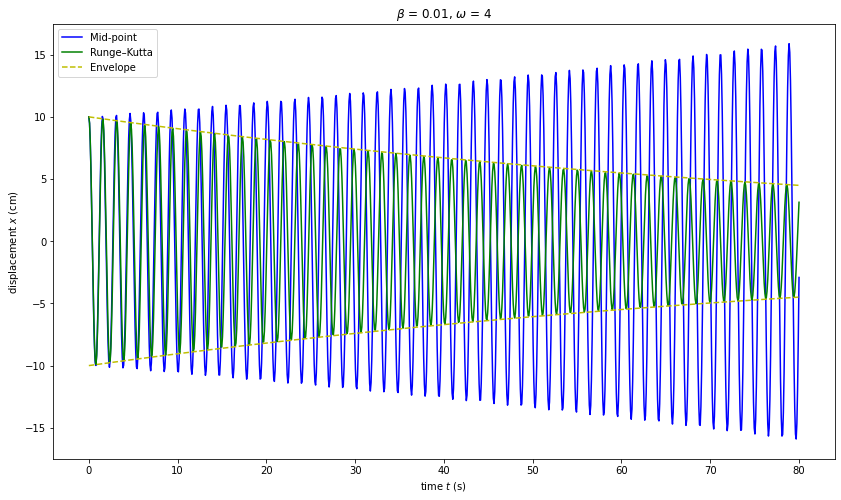

In [94]:
# plot the solutions
# format: plot_solutions(beta, omega, x0, v0)
plot_solutions(0.01, 4, 10, 0)